In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_data_dir='/home/kapil/Desktop/my_deep_learning/23777_30378_upload_test_set/test_set'
train_data_dir='/home/kapil/Desktop/my_deep_learning/23777_30378_upload_training_set/training_set'
# print(train_data_dir)
# home/kapil/Desktop/my_deep_learning/23777_30378_upload_training_set/training_set

In [4]:
img_width=64
img_height=64
batch_size=20

In [5]:
datagen= ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=datagen.flow_from_directory(directory= train_data_dir, target_size=(img_width,img_height), classes=['dogs', 'cats'], class_mode='binary',
                                           batch_size=batch_size);

Found 8005 images belonging to 2 classes.


In [7]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
# validation_generator= datagen.flow_from_directory(directory= valid_data_dir,
#                                                  target_size=(64,64),
#                                                  classes=['dogs', 'cats'],
#                                                  class_mode='binary',
#                                                  batch_size=batch_size)

In [9]:
len(train_generator)

401

## Build CNN Base Model

In [10]:
model= Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='normal', input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
opt=SGD(learning_rate= 0.01, momentum=0.9 )
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history= model.fit(train_generator , steps_per_epoch=len(train_generator), epochs=10,  verbose=1)

Epoch 1/10
401/401 [==============================] - 62s 155ms/step - loss: 0.7247 - accuracy: 0.4952
Epoch 2/10
401/401 [==============================] - 64s 160ms/step - loss: 0.6925 - accuracy: 0.5096
Epoch 3/10
401/401 [==============================] - 64s 161ms/step - loss: 0.6941 - accuracy: 0.5054
Epoch 4/10
401/401 [==============================] - 64s 159ms/step - loss: 0.6927 - accuracy: 0.5042
Epoch 5/10
401/401 [==============================] - 63s 156ms/step - loss: 0.6935 - accuracy: 0.5104
Epoch 6/10
401/401 [==============================] - 63s 158ms/step - loss: 0.6912 - accuracy: 0.5149
Epoch 7/10
401/401 [==============================] - 63s 156ms/step - loss: 0.6912 - accuracy: 0.5167
Epoch 8/10
401/401 [==============================] - 64s 160ms/step - loss: 0.6874 - accuracy: 0.5362
Epoch 9/10
401/401 [==============================] - 64s 161ms/step - loss: 0.6818 - accuracy: 0.5514
Epoch 10/10
401/401 [==============================] - 63s 156ms/step - l

In [13]:
def plot_learning_curve(history):
    #ploting curve & validation accuracy values
    epoch_range=range(1,11)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
   # plt.legend(['train'], loc='upper-left')
    plt.show()
    
    #ploting training loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
   # plt.legend(['train'], loc='upper-left')
    plt.show()

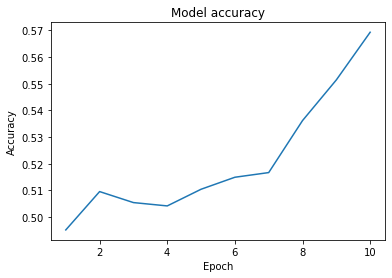

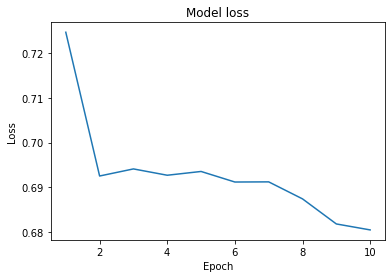

In [14]:
plot_learning_curve(history)

## Implement of first three block VGG-16

In [15]:
model1= Sequential()
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='normal', input_shape=(img_width,img_height,3)))
model1.add(MaxPool2D(2,2))

#model= Sequential()
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_initializer='normal'))
model1.add(MaxPool2D(2,2))
          
#model= Sequential()
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_initializer='normal'))
model1.add(MaxPool2D(2,2))          

model1.add(Flatten())
model1.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
          
model1.add(Dense(1, activation='sigmoid'))

In [16]:
opt=SGD(learning_rate= 0.01, momentum=0.9 )
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history= model1.fit_generator(generator=train_generator , steps_per_epoch=len(train_generator), epochs=5,  verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 120s 299ms/step - loss: 0.7145 - accuracy: 0.5227
Epoch 2/5
401/401 [==============================] - 213s 531ms/step - loss: 0.6877 - accuracy: 0.5434
Epoch 3/5
401/401 [==============================] - 263s 655ms/step - loss: 0.6854 - accuracy: 0.5414
Epoch 4/5
401/401 [==============================] - 270s 673ms/step - loss: 0.6793 - accuracy: 0.5705
Epoch 5/5
401/401 [==============================] - 268s 668ms/step - loss: 0.6822 - accuracy: 0.5554


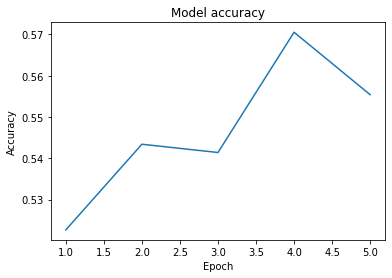

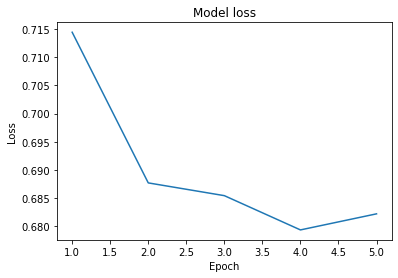

In [22]:
def plot_learning_curve1(history):
    #ploting curve & validation accuracy values
    epoch_range=range(1,6)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
   # plt.legend(['train'], loc='upper-left')
    plt.show()
    
    #ploting training loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
   # plt.legend(['train'], loc='upper-left')
    plt.show()
plot_learning_curve1(history)

## adding BatchNormalizatoin and Dropout to the above VGG-16 block

In [26]:
model2= Sequential()
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='normal', input_shape=(img_width,img_height,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.2))

#model= Sequential()
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_initializer='normal'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.3))
          
#model= Sequential()
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_initializer='normal'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.5))         

model2.add(Flatten())
model2.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
          
model2.add(Dense(1, activation='sigmoid'))

In [27]:
opt=SGD(learning_rate= 0.01, momentum=0.9 )
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history= model2.fit_generator(generator=train_generator , steps_per_epoch=len(train_generator), epochs=5,  verbose=1)

Epoch 1/5
401/401 [==============================] - 1029s 3s/step - loss: 0.7667 - accuracy: 0.5367
Epoch 2/5
401/401 [==============================] - 1116s 3s/step - loss: 0.7351 - accuracy: 0.5565
Epoch 3/5
401/401 [==============================] - 530s 1s/step - loss: 0.7089 - accuracy: 0.5839
Epoch 4/5
401/401 [==============================] - 533s 1s/step - loss: 0.7019 - accuracy: 0.5899
Epoch 5/5
401/401 [==============================] - 536s 1s/step - loss: 0.6887 - accuracy: 0.5954


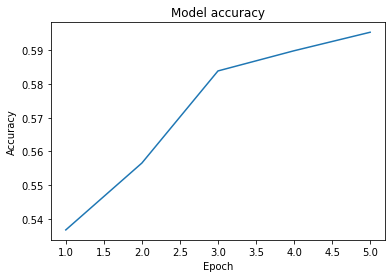

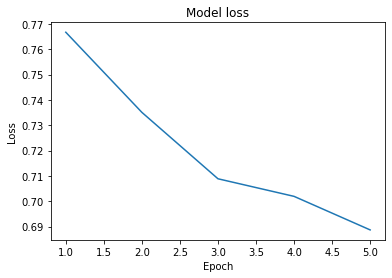

In [30]:
plot_learning_curve1(history)